* 题目分类： https://github.com/lxztju/leetcode-algorithm
* Leecode solution: https://walkccc.me/LeetCode/problems/0167/

# 双指针（对撞指针）

### 167 有序数组的 Two Sum 2
Input: numbers = [2,7,11,15], target = 9
Output: [1,2]
Explanation: The sum of 2 and 7 is 9. Therefore, index1 = 1, index2 = 2. We return [1, 2].

In [ ]:
### Problem: Find index of target in array
### Solution: Loop index

### Problem: Use of while() loop
### Solution: 
###     * Update start/end to make sure while could end
###     * Return after while might be necessary

### 头尾指针
def twoSum(numbers, target):
    """
    :type numbers: List[int]
    :type target: int
    :rtype: List[int]
    """

    start, end = 0, len(numbers)-1
    while (start < end):
        _sum = numbers[start] + numbers[end]
        if _sum < target:
            start += 1
        elif _sum > target:
            end -= 1
        else:
            return (start+1, end+1)
    return []


Idea:
* 缩减搜索空间 https://leetcode-cn.com/problems/two-sum-ii-input-array-is-sorted/solution/yi-zhang-tu-gao-su-ni-on-de-shuang-zhi-zhen-jie-fa/
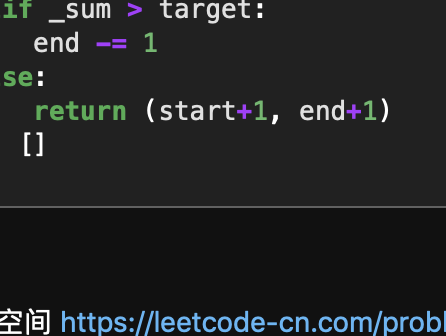
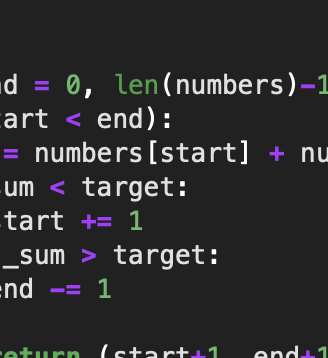

### 11 盛最多水的容器 Container With Most Water
Given n non-negative integers a1, a2, ..., an , where each represents a point at coordinate (i, ai). n vertical lines are drawn such that the two endpoints of the line i is at (i, ai) and (i, 0). Find two lines, which, together with the x-axis forms a container, such that the container contains the most water.

Notice that you may not slant the container.


In [ ]:

def maxArea(height):
        """
        :type height: List[int]
        :rtype: int
        """
        start, end = 0, len(height)-1
        max_area = 0  #存储最大面积
        while start < end:
            area = (end - start) * min(height[start], height[end])
            max_area = max(area, max_area)   #更新最大的面积
            if height[start] < height[end]:
                start += 1  #高度较低的那一端向前移动，寻找较高的高度
            else:
                end -= 1
        return max_area


Idea: 缩减搜索空间
https://leetcode-cn.com/problems/container-with-most-water/solution/on-shuang-zhi-zhen-jie-fa-li-jie-zheng-que-xing-tu/
取决于最短的柱子，长柱子向内侧移的选项都被排除


### 633 两数的平方和 Sum of Square Numbers

Given a non-negative integer c, decide whether there're two integers a and b such that a^2 + b^2 = c.




In [ ]:
def judgeSquareSum(c):
    """
    :type c: int
    :rtype: bool
    """
    start, end = 0, int(sqrt(c))
    while (start <= end):
        _sum = start**2 + end**2
        if _sum < c:
            start += 1
        elif _sum > c:
            end -= 1
        else:
            return True
    return False



### 345 反转元音字符 Reverse Vowels of a String
Given a string s, reverse only all the vowels in the string and return it.
The vowels are 'a', 'e', 'i', 'o', and 'u', and they can appear in both cases.

Input: s = "leetcode"
Output: "leotcede"

In [ ]:
def reverseVowels(s):
    """
    :type s: str
    :rtype: str
    """
    def isVowel(ch: str) -> bool:
        return ch in "aeiouAEIOU"
    
    n = len(s)
    s = list(s)
    i, j = 0, n - 1
    while i < j:
        while i < n and not isVowel(s[i]):
            i += 1
        while j > 0 and not isVowel(s[j]):
            j -= 1
        if i < j:
            s[i], s[j] = s[j], s[i]
            i += 1
            j -= 1
    return "".join(s)


### 125 验证回文串 Valid Palindrome
Given a string s, determine if it is a palindrome, considering only alphanumeric characters and ignoring cases.

Input: s = "A man, a plan, a canal: Panama"
Output: true
Explanation: "amanaplanacanalpanama" is a palindrome.


In [ ]:

def isPalindrome(s):
    """
    :type s: str
    :rtype: bool
    """
    s = [char for char in s.lower() if char.isalnum()]
    start, end = 0, len(s)-1
    while (start <= end):
        if s[start] == s[end]:
            start += 1
            end -= 1
        else:
            return False
    return True



### 680 验证回文字符串2 Valid Palindrome II
Given a string s, return true if the s can be palindrome after deleting at most one character from it.

In [ ]:

### Problem: In while loop, deal with only-once scenario
### Solution: 
def validPalindrome(s):
    """
    :type s: str
    :rtype: bool
        """
    s = [char for char in s.lower() if char.isalnum()]
    def isPalindrome(s, start, end):
            while start < end:
                if s[start] == s[end]:
                    start += 1
                    end -= 1
                    continue
                else: return False
            return True

    start, end = 0, len(s)-1
    while start < end:
        if s[start] == s[end]:
            start += 1
            end -= 1
            continue
        else: 
            return isPalindrome(s, start+1, end) or isPalindrome(s, start, end-1)
    return True


# 快慢指针
linked list: 获取倒数第k个元素，获取中间位置的元素，判断链表是否存在环，判断环的长度
https://leetcode-cn.com/problems/linked-list-cycle/solution/yi-wen-gao-ding-chang-jian-de-lian-biao-wen-ti-h-2/  
剑指 Offer 22. 链表中倒数第k个节点

第876题：链表的中间结点

第141题：环形链表

### 141 Linked List Cycle

In [ ]:
def hasCycle(head: ListNode) -> bool:
    seen = set()
    while head.next:
        if head in seen:
            return True
        seen.add(head)
        head = head.next
    return False


In [ ]:
def hasCycle(head: ListNode) -> bool:
    i = head
    j = head
    if not head:
        return False
    while i.next and j.next and j.next.next :
        if i.next != j.next.next:
            i = i.next
            j = j.next.next
        else:
            return True
    return False

### 283 Move Zeros
Given an integer array nums, move all 0's to the end of it while maintaining the relative order of the non-zero elements.

In [5]:
def moveZeroes(nums):
    """
    :type nums: List[int]
    :rtype: None Do not return anything, modify nums in-place instead.
    """
    slow, fast = 0, 0
    while fast < len(nums):
        if nums[slow] != 0:
            slow = slow + 1
        elif nums[fast] != 0:
                nums[slow], nums[fast] = nums[fast], nums[slow]
                slow += 1
        fast += 1
    while slow < len(nums):
        nums[slow] = 0
        slow += 1
    return nums

### 26 Remove Duplicates from Sorted Array
Given an integer array nums sorted in non-decreasing order, remove the duplicates in-place such that each unique element appears only once. The relative order of the elements should be kept the same.

Input: nums = [1,1,2]
Output: 2, nums = [1,2,_]
Explanation: Your function should return k = 2, with the first two elements of nums being 1 and 2 respectively.
It does not matter what you leave beyond the returned k (hence they are underscores).

In [ ]:
def removeDuplicates( nums):
    """
    :type nums: List[int]
    :rtype: int
    """
    slow, fast = 0, 1
    while fast < len(nums):
        if nums[fast] > nums[slow]:
            nums[slow+1], nums[fast] = nums[fast], nums[slow+1]
            slow += 1
            fast += 1
        else:
            fast += 1
    return slow + 1

### 80 Remove Duplicates from Sorted Array II
Given an integer array nums sorted in non-decreasing order, remove some duplicates in-place such that each unique element appears at most twice.

Input: nums = [1,1,1,2,2,3]
Output: 5, nums = [1,1,2,2,3,_]
Explanation: Your function should return k = 5, with the first five elements of nums being 1, 1, 2, 2 and 3 respectively.
It does not matter what you leave beyond the returned k (hence they are underscores).

In [ ]:
def removeDuplicates(self, nums: List[int]) -> int:
    if not nums: return 0
    flag = True
    slower, faster = 0, 1
    while faster <len(nums):
        if nums[slower] != nums[faster]:
            slower += 1
            nums[slower] = nums[faster]
            flag = True
        else:
            if flag:
                slower += 1
                nums[slower] = nums[faster]
                flag = False
        faster += 1 
    return slower + 1

shorter way with for loop, syntac sugar:
https://leetcode-cn.com/problems/remove-duplicates-from-sorted-array-ii/solution/shan-chu-pai-xu-shu-zu-zhong-de-zhong-fu-yec2/

# 其他指针

# 88 Merge Sorted Array, in place
The final sorted array should not be returned by the function, but instead be stored inside the array nums1. To accommodate this, nums1 has a length of m + n

Input: nums1 = [1,2,3,0,0,0], m = 3, nums2 = [2,5,6], n = 3
Output: [1,2,2,3,5,6]

In [ ]:
def merge(nums1, m, nums2, n):
    """
    :type nums1: List[int]
    :type m: int
    :type nums2: List[int]
    :type n: int
    :rtype: None Do not return anything, modify nums1 in-place instead.
    """
    p1, p2 = m - 1, n - 1
    tail = m + n - 1
    while p1 >= 0 or p2 >= 0:
        if p1 == -1:
            nums1[tail] = nums2[p2]
            p2 -= 1
        elif p2 == -1:
            nums1[tail] = nums1[p1]
            p1 -= 1
        elif nums1[p1] > nums2[p2]:
            nums1[tail] = nums1[p1]
            p1 -= 1
        else:
            nums1[tail] = nums2[p2]
            p2 -= 1
        tail -= 1
        

如果直接合并到数组 nums1 中，nums1​ 中的元素可能会在取出之前被覆盖。那么如何直接避免覆盖 nums1​ 中的元素呢？观察可知，nums1 的后半部分是空的，可以直接覆盖而不会影响结果。因此可以指针设置为从后向前遍历，每次取两者之中的较大者放进 nums1​ 的最后面。

### 524. Longest Word in Dictionary through Deleting
Given a string s and a string array dictionary, return the longest string in the dictionary that can be formed by deleting some of the given string characters. If there is more than one possible result, return the longest word with the smallest lexicographical order. If there is no possible result, return the empty string.

Input: s = "abpcplea", dictionary = ["ale","apple","monkey","plea"]
Output: "apple"

In [11]:
def findLongestWord(s, dictionary):
    """
    :type s: str
    :type dictionary: List[str]
    :rtype: str
    """
    def is_contained(s, word):
        i, j = 0,0
        while i < len(s) and j < len(word):
            if s[i] == word[j]:
                i += 1
                j += 1
            else:
                i += 1
        return j == len(word) 
    contained = [word for word in dictionary if is_contained(s, word)]
    max_len = max([len(word) for word in contained])
    max_word = sorted([word for word in contained if len(word) == max_len])
    return max_word[0]

Update max candidate to find max along the way, instead of finding it after looping through

In [ ]:
def findLongestWord(self, s: str, dictionary: List[str]) -> str:
        res = ""
        for t in dictionary:
            i = j = 0
            while i < len(t) and j < len(s):
                if t[i] == s[j]:
                    i += 1
                j += 1
            if i == len(t):
                if len(t) > len(res) or (len(t) == len(res) and t < res):
                    res = t
        return res


In [12]:
s = "abpcplea"
dictionary = ["ale","apple","monkey","plea"]
findLongestWord(s, dictionary)

'apple'